In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

Cargamos el dataset, lo dividimos en train y test.

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

### Como es el dataset?

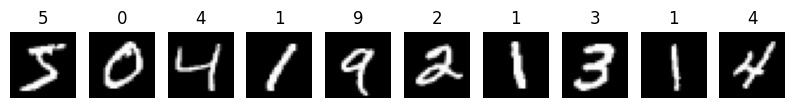

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")
    plt.title(str(y_train[i]))
plt.show()

### Como hacemos una red neuronal para clasificar imágenes de dígitos escritos a mano?
- Primero aplanamos las imágenes de 28x28 a un vector de 784 pixeles.
- Luego tenemos una capa oculta con 128 neuronas.
- Finalmente una capa de salida con 10 neuronas (una por cada dígito).


<img src="assets/mnist-exp.png" alt="image-2.png" width="500" style="margin-top: 10px;"/>

In [32]:
num_classes = 10
input_shape = (28, 28)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(15, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 15)             │        11,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,935 (46.62 KB)

 Trainable params: 11,935 (46.62 KB)

 Non-trainable params: 0 (0.00 B)

### Ahora entrenamos el modelo
Primero compilamos el modelo, definiendo:
- La función de pérdida: Es la función que decide que tan lejos estamos del valor real.
- Optimizador: Es el algoritmo que ajusta los pesos de la red para minimizar la función de pérdida. Usamos "adam", que es un optimizador popular y eficiente.
- Métricas: Ya deberian saber :D, usamos accuracy.

In [33]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=64, epochs=15, validation_split=0.1)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2748 - loss: 7.4072 - val_accuracy: 0.4822 - val_loss: 1.4367
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.4890 - loss: 1.4345 - val_accuracy: 0.6430 - val_loss: 1.0729
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.6312 - loss: 1.0842 - val_accuracy: 0.6782 - val_loss: 0.8805
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6839 - loss: 0.9106 - val_accuracy: 0.7180 - val_loss: 0.8007
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.7153 - loss: 0.8017 - val_accuracy: 0.7665 - val_loss: 0.6919
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7546 - loss: 0.7092 - val_accuracy: 0.8028 - val_loss: 0.5943
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.7897 - loss: 0.6438 - val_accuracy: 0.8333 - val_loss: 0.5319
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8285 - loss: 0.5520 - val_accu

In [16]:
score = model.evaluate(X_test, y_test, batch_size=64, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.34227970242500305
Test accuracy: 0.9115999937057495


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


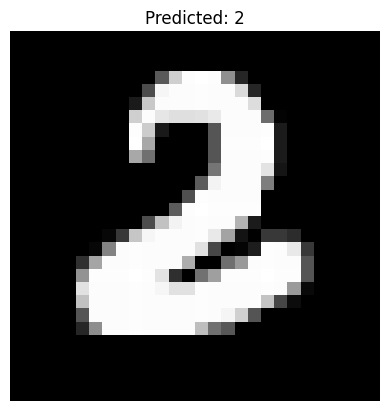

In [25]:
import numpy as np
import matplotlib.pyplot as plt
idx = np.random.randint(0, X_test.shape[0])
img = X_test[idx]
pred = model.predict(np.array([img]))
plt.imshow(img, cmap="gray")
plt.title(f"Predicted: {np.argmax(pred)}")
plt.axis("off")
plt.show()